# Experimentation and Uplift testing 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes = True)

In [2]:
transactions = pd.read_csv(r'C:\Users\NAMEERA\Desktop\Quantium\transactions.csv')

In [3]:
transactions

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium,NATURAL
1,1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,CCS
2,2,2018-11-10,1,1307,346,96,2,3.8,160,WW Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget,WOOLWORTHS
3,3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,MIDAGE SINGLES/COUPLES,Budget,CCS
4,4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,SMITHS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,264829,2019-03-09,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream,YOUNG SINGLES/COUPLES,Premium,KETTLE
264830,264830,2018-08-13,272,272358,270154,74,1,4.4,175,Tostitos Splash Of Lime,YOUNG SINGLES/COUPLES,Premium,TOSTITOS
264831,264831,2018-11-06,272,272379,270187,51,2,8.8,170,Doritos Mexicana,YOUNG SINGLES/COUPLES,Premium,DORITOS
264832,264832,2018-12-27,272,272379,270188,42,2,7.8,150,Doritos Corn Chip Mexican Jalapeno,YOUNG SINGLES/COUPLES,Premium,DORITOS


In [4]:
transactions = transactions.loc[:,~transactions.columns.str.contains('Unnamed')]

In [5]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PRODUCT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,2,6.0,175,Natural Chip Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium,NATURAL
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,CCS
2,2018-11-10,1,1307,346,96,2,3.8,160,WW Original Stacked Chips,MIDAGE SINGLES/COUPLES,Budget,WOOLWORTHS
3,2019-03-09,1,1307,347,54,1,2.1,175,CCs Original,MIDAGE SINGLES/COUPLES,Budget,CCS
4,2019-05-20,1,1343,383,61,2,2.9,170,Smiths Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,SMITHS
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,2,10.8,175,Kettle Sweet Chilli And Sour Cream,YOUNG SINGLES/COUPLES,Premium,KETTLE
264830,2018-08-13,272,272358,270154,74,1,4.4,175,Tostitos Splash Of Lime,YOUNG SINGLES/COUPLES,Premium,TOSTITOS
264831,2018-11-06,272,272379,270187,51,2,8.8,170,Doritos Mexicana,YOUNG SINGLES/COUPLES,Premium,DORITOS
264832,2018-12-27,272,272379,270188,42,2,7.8,150,Doritos Corn Chip Mexican Jalapeno,YOUNG SINGLES/COUPLES,Premium,DORITOS


In [6]:
transactions.rename(columns={'WEIGHT':'PACK_SIZE'},inplace= True)

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264834 non-null  object 
 1   STORE_NBR         264834 non-null  int64  
 2   LYLTY_CARD_NBR    264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_QTY          264834 non-null  int64  
 6   TOT_SALES         264834 non-null  float64
 7   PACK_SIZE         264834 non-null  int64  
 8   PRODUCT           264834 non-null  object 
 9   LIFESTAGE         264834 non-null  object 
 10  PREMIUM_CUSTOMER  264834 non-null  object 
 11  BRAND             264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [8]:
quantity = pd.read_csv(r'C:\Users\NAMEERA\Desktop\Quantium\transaction_data_mining.csv')
quantity

,Unnamed: 0,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,BRAND,TXN_ID
0,0,1000,YOUNG SINGLES/COUPLES,Premium,2,NATURAL,1
1,1,1307,MIDAGE SINGLES/COUPLES,Budget,3,CCS,348
2,2,1307,MIDAGE SINGLES/COUPLES,Budget,2,WOOLWORTHS,346
3,3,1307,MIDAGE SINGLES/COUPLES,Budget,1,CCS,347
4,4,1343,MIDAGE SINGLES/COUPLES,Budget,2,SMITHS,383
...,...,...,...,...,...,...,...
264829,264829,272319,YOUNG SINGLES/COUPLES,Premium,2,KETTLE,270088
264830,264830,272358,YOUNG SINGLES/COUPLES,Premium,1,TOSTITOS,270154
264831,264831,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS,270187
264832,264832,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS,270188


In [9]:
quantity = quantity.loc[:,~quantity.columns.str.contains('Unnamed')]
quantity

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,BRAND,TXN_ID
0,1000,YOUNG SINGLES/COUPLES,Premium,2,NATURAL,1
1,1307,MIDAGE SINGLES/COUPLES,Budget,3,CCS,348
2,1307,MIDAGE SINGLES/COUPLES,Budget,2,WOOLWORTHS,346
3,1307,MIDAGE SINGLES/COUPLES,Budget,1,CCS,347
4,1343,MIDAGE SINGLES/COUPLES,Budget,2,SMITHS,383
...,...,...,...,...,...,...
264829,272319,YOUNG SINGLES/COUPLES,Premium,2,KETTLE,270088
264830,272358,YOUNG SINGLES/COUPLES,Premium,1,TOSTITOS,270154
264831,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS,270187
264832,272379,YOUNG SINGLES/COUPLES,Premium,2,DORITOS,270188


In [10]:
transactions.shape

(264834, 12)

<AxesSubplot:>

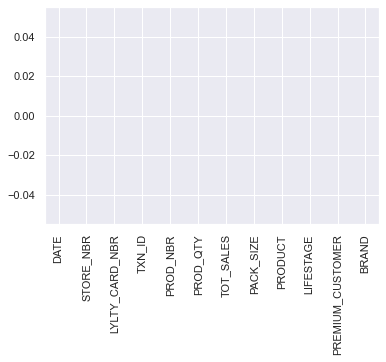

In [11]:
transactions.isna().sum().plot(kind='bar')

# Selecting Control Stores

The client has selected stores 77,86 and 88 as trial stores. Based on the performances of these particular stores, the client has asked to select control stores for the entire operation period.

The goal is to match the control stores to the trial stores prior to the period of 2019 on the basis of the following :
- Monthly sales revenue
- Monthly number of customers 
- Monthly transactions

Since primary importance is given to the transactions made during a time period, let's assume that the metric of interest is the 'date'.

In [12]:
import datetime 

In [13]:
transactions.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
PRODUCT              object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
BRAND                object
dtype: object

In [14]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'])
transactions['LIFESTAGE'] = transactions['LIFESTAGE'].astype('category')
transactions['PREMIUM_CUSTOMER'] = transactions['BRAND'].astype('category')

<ipython-input-14-814833df32e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['DATE'] = pd.to_datetime(transactions['DATE'])
<ipython-input-14-814833df32e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['LIFESTAGE'] = transactions['LIFESTAGE'].astype('category')
<ipython-input-14-814833df32e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [15]:
#to create metric of interest and filter stores that were present during pre-trial period
#create year-month column of format yyyymm

In [16]:
yearmonth = transactions['DATE'].dt.strftime('%Y%m')

In [17]:
transactions['YEARMONTH'] = yearmonth

In [18]:
transactions['YEARMONTH'] = transactions['YEARMONTH'].astype(int)
transactions.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
PRODUCT                     object
LIFESTAGE                 category
PREMIUM_CUSTOMER          category
BRAND                       object
YEARMONTH                    int32
dtype: object

In [19]:
transactions.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
PRODUCT             0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
BRAND               0
YEARMONTH           0
dtype: int64

In [20]:
transactions['YEARMONTH'].value_counts()

201812    22835
201903    22592
201807    22562
201808    22410
201905    22391
201810    22288
201901    22161
201811    21852
201906    21829
201904    21766
201809    21743
201902    20405
Name: YEARMONTH, dtype: int64

For each store and month, calculate the following : 
- total sales
- number of customers
- transactions per customer
- chips per customer 
- average price per unit

In [21]:
#total sales per store 
totSales = transactions.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
totSales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [22]:
#number of customers for every store per month
nCustomers = transactions.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
nCustomers

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [23]:
#number of transactions per customer, for every store per month
nTxnPerCust = transactions.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()/transactions.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
nTxnPerCust

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [24]:
#Average price per unit
avgPricePerUnit = transactions.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()/transactions.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum()
avgPricePerUnit

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [25]:
#number of chips per transactions
nChipsPerTxn = transactions.groupby(['STORE_NBR','YEARMONTH'])['PROD_QTY'].sum()/transactions.groupby(['STORE_NBR','YEARMONTH'])['TXN_ID'].nunique()
nChipsPerTxn

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.909091
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

Merge all the variables to form a separate dataframe of its own

In [26]:
data = [totSales,nCustomers,nTxnPerCust,avgPricePerUnit,nChipsPerTxn]
#concatenate the variables into a new dataframe- measureOverTime 
measureOverTime = pd.concat(data, join = 'outer', axis=1)
measureOverTime

TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR YEARMONTH                                                         
1         201807         206.9              49  1.061224  3.337097  1.192308
          201808         176.1              42  1.023810  3.261111  1.255814
          201809         278.8              59  1.050847  3.717333  1.209677
          201810         188.1              44  1.022727  3.243103  1.288889
          201811         192.6              46  1.021739  3.378947  1.212766
...                        ...             ...       ...       ...       ...
272       201902         395.5              45  1.066667  4.346154  1.895833
          201903         442.3              50  1.060000  4.379208  1.905660
          201904         445.1              54  1.018519  4.239048  1.909091
          201905         314.6              34  1.176471  4.430986  1.775000
          201906         312.1              34  1.088235  4.458571  1.891892

[3169 rows x 5 columns]

In [27]:
measureOverTime.rename(columns={'TOT_SALES':'totSales','LYLTY_CARD_NBR':'nCustomers',0:'nChipsPerCust',1:'avgPricePerUnit',2:'nChipsPerTxn'},inplace=True)
measureOverTime.head()

totSales  nCustomers  nChipsPerCust  avgPricePerUnit  \
STORE_NBR YEARMONTH                                                         
1         201807        206.9          49       1.061224         3.337097   
          201808        176.1          42       1.023810         3.261111   
          201809        278.8          59       1.050847         3.717333   
          201810        188.1          44       1.022727         3.243103   
          201811        192.6          46       1.021739         3.378947   

                     nChipsPerTxn  
STORE_NBR YEARMONTH                
1         201807         1.192308  
          201808         1.255814  
          201809         1.209677  
          201810         1.288889  
          201811         1.212766

In [28]:
#Count number of transactions for each store
a = pd.pivot_table(transactions, index= 'STORE_NBR', columns = 'YEARMONTH', values = 'TXN_ID', aggfunc = 'count')
a 

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


<AxesSubplot:xlabel='YEARMONTH'>

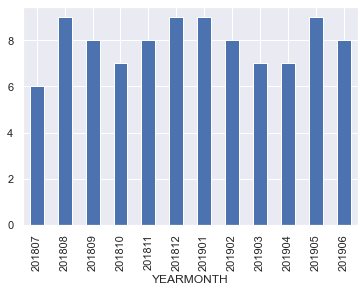

In [29]:
a.isnull().sum().plot(kind='bar')

In [30]:
#filter stores with full observations from the ones with null-observation of certain dates
null_stores = a[a.isnull().any(axis=1)].index.to_list()

In [31]:
null_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [32]:
#drop null stores from measureOverTime 
measureOverTime.head()

totSales  nCustomers  nChipsPerCust  avgPricePerUnit  \
STORE_NBR YEARMONTH                                                         
1         201807        206.9          49       1.061224         3.337097   
          201808        176.1          42       1.023810         3.261111   
          201809        278.8          59       1.050847         3.717333   
          201810        188.1          44       1.022727         3.243103   
          201811        192.6          46       1.021739         3.378947   

                     nChipsPerTxn  
STORE_NBR YEARMONTH                
1         201807         1.192308  
          201808         1.255814  
          201809         1.209677  
          201810         1.288889  
          201811         1.212766

In [33]:
measureOverTime.reset_index(inplace= True)

In [34]:
measureOverTime = measureOverTime[~measureOverTime['STORE_NBR'].isin(null_stores)]
measureOverTime

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,4.346154,1.895833
3165,272,201903,442.3,50,1.060000,4.379208,1.905660
3166,272,201904,445.1,54,1.018519,4.239048,1.909091
3167,272,201905,314.6,34,1.176471,4.430986,1.775000


In [35]:
len(measureOverTime)

3120

In [36]:
#filter the values for pre-trial into preTrialMeasures
preTrialMeasures = measureOverTime.loc[measureOverTime['YEARMONTH']<201902,:]
len(preTrialMeasures)

1820

In [37]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


To calculate and rank the similarities between each potential control store to the trial stores specified by the client, based on a singular metric, a function is to be defined. This function would calculate the correlation amidst the trial and control stores. Another function would calculate the significant difference in magnitude amidst the trial and control store.

In [38]:
from scipy.stats import pearsonr

In [39]:
# define a correlation function for a single metric between the trial and control group 
def calculateCorrelation(inputTable,metric,trial_store):
    '''This function takes a table as an input, its specified metric and the trial store
    to iterate through all the other stores and find its best control store match'''
    outputTable = pd.DataFrame({'Store_1':[],'Store_2':[],'Correlation':[]})
    a = inputTable.loc[inputTable['STORE_NBR']== trial_store,metric]
    a.reset_index(drop=True,inplace=True)
    stores = inputTable['STORE_NBR'].unique()
    for i in stores:
        b = inputTable.loc[inputTable['STORE_NBR']==i, metric]
        b.reset_index(drop= True, inplace=True)
        outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Correlation':b.corr(a)},ignore_index=True)
    return outputTable


In [40]:
# define a function to calculate magnitude difference between trial store and control store on the basis of a single metric
def calculateMagnitudeDistance(inputTable,metric,trial_store):
    '''To calculate metric difference between trial store and control stores '''
    outputTable = pd.DataFrame({'Store_1':[],'Store_2':[],'Magnitude':[]})
    a = inputTable.loc[inputTable['STORE_NBR']== trial_store,metric]
    a.reset_index(drop=True, inplace=True)
    stores = inputTable['STORE_NBR'].unique()
    for i in stores:
        b = inputTable.loc[inputTable['STORE_NBR']==i, metric]
        b.reset_index(drop=True, inplace=True)
        #standardise the magnitude distance just so it ranges from 0 to 1
        c = abs(a-b) # c= measure
        d = np.mean(1- (c-min(c))/(max(c)-min(c)))
        outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Magnitude':d},ignore_index=True)
    return outputTable

# Trial store 77

In [41]:
trial_store = 77

#use the functions for each metric initialised previously
corr_Sales  = calculateCorrelation(preTrialMeasures,'totSales',trial_store)
corr_customers  = calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
mag_sales = calculateMagnitudeDistance(preTrialMeasures,'totSales',trial_store)
mag_customers = calculateMagnitudeDistance(preTrialMeasures,'nCustomers',trial_store)

In [42]:
corr_Sales

,Store_1,Store_2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652
...,...,...,...
255,77.0,268.0,0.344757
256,77.0,269.0,-0.315730
257,77.0,270.0,0.315430
258,77.0,271.0,0.355487


In [43]:
mag_sales

,Store_1,Store_2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320
...,...,...,...
255,77.0,268.0,0.429787
256,77.0,269.0,0.559099
257,77.0,270.0,0.591547
258,77.0,271.0,0.341091


In [44]:
# concatenate the scores for each metric 
scores_nSales = pd.concat([corr_Sales,mag_sales['Magnitude']],axis=1)

#column to calculate simple average of the correlated score
corr_weight = 0.5
scores_nSales['scoreNSales'] = corr_weight * corr_Sales['Correlation'] + corr_weight * scores_nSales['Magnitude']

In [45]:
scores_nSales.head()

,Store_1,Store_2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [46]:
#for ncustomers

scores_nCustomers = pd.concat([corr_customers,mag_customers['Magnitude']],axis=1)

scores_nCustomers['scoreNCustomers'] =  corr_weight * corr_customers['Correlation'] + corr_weight * scores_nCustomers['Magnitude']
scores_nCustomers.head()

,Store_1,Store_2,Correlation,Magnitude,scoreNCustomers
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [47]:
scores_nSales.set_index(['Store_1','Store_2'],inplace=True)
scores_nCustomers.set_index(['Store_1','Store_2'],inplace=True)

In [48]:
#merge both the dataframes as score_Control
score_Control = pd.concat([scores_nSales['scoreNSales'],scores_nCustomers['scoreNCustomers']],axis=1)
score_Control.head()

scoreNSales  scoreNCustomers
Store_1 Store_2                              
77.0    1.0         0.241691         0.493017
        2.0         0.163520        -0.050311
        3.0         0.664779         0.662002
        4.0         0.190817         0.101310
        5.0         0.202834         0.441632

In [49]:
#to calculate final control score for the stores
#add a new column in score_Control
score_Control['finalControlScore']= score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCustomers'] * 0.5
score_Control.head()

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
77.0    1.0         0.241691         0.493017           0.367354
        2.0         0.163520        -0.050311           0.056604
        3.0         0.664779         0.662002           0.663390
        4.0         0.190817         0.101310           0.146064
        5.0         0.202834         0.441632           0.322233

The final control score defines the correlation and its magnitude of the similarities between the trial and other store performances. By sorting the values from highest score to lowest, we would be able to select a control store, in essence, the one with the highest final control score.                          

In [50]:
#sort values in descending order
score_Control.sort_values(by='finalControlScore',ascending=False)

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
77.0    233.0       0.697290         0.816607           0.756949
        71.0        0.789497         0.663123           0.726310
        84.0        0.656972         0.715000           0.685986
        119.0       0.636046         0.729729           0.682887
        115.0       0.708347         0.645155           0.676751
...                      ...              ...                ...
        242.0      -0.121818        -0.046675          -0.084247
        186.0      -0.128806        -0.057268          -0.093037
        102.0      -0.102238        -0.119121          -0.110680
        9.0        -0.144121        -0.087135          -0.115628
        77.0             NaN              NaN                NaN

[260 rows x 3 columns]

The control store selected is 233 since it has the closest score to store no. 77.
Visualising the correlation amidst store 77 and 223 to confirm the drivers of the store before trial period:


In [51]:
#set control store as 223
control_store = 233

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-51-eb5c4722434b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES


In [52]:
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        1820 non-null   int64  
 1   YEARMONTH        1820 non-null   int64  
 2   totSales         1820 non-null   float64
 3   nCustomers       1820 non-null   int64  
 4   nChipsPerCust    1820 non-null   float64
 5   avgPricePerUnit  1820 non-null   float64
 6   nChipsPerTxn     1820 non-null   float64
 7   store_type       1820 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [53]:
#adding a transaction month column to denote the start of each month in pastSales
#this is done to plot the trend for customer transactions during the pre-trial period
#since the YEARMONTH column is an int, convert it to string and then datetime 
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

<ipython-input-53-9bf7f867c3aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


In [54]:
pastSales['store_type'].unique()

array(['OTHER STORES', 'TRIAL STORE', 'CONTROL STORE'], dtype=object)

In [55]:
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   STORE_NBR         1820 non-null   int64         
 1   YEARMONTH         1820 non-null   int64         
 2   totSales          1820 non-null   float64       
 3   nCustomers        1820 non-null   int64         
 4   nChipsPerCust     1820 non-null   float64       
 5   avgPricePerUnit   1820 non-null   float64       
 6   nChipsPerTxn      1820 non-null   float64       
 7   store_type        1820 non-null   object        
 8   TransactionMonth  1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [56]:
pastSales[pastSales['store_type']=='CONTROL STORE']

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,CONTROL STORE,2018-07-01
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,CONTROL STORE,2018-08-01
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,CONTROL STORE,2018-09-01
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,CONTROL STORE,2018-10-01
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,CONTROL STORE,2018-11-01
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,CONTROL STORE,2018-12-01
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,CONTROL STORE,2019-01-01


In [57]:
#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

In [58]:
controlSalesPlot

,Control Store
TransactionMonth,
2018-07-01,290.7
2018-08-01,285.9
2018-09-01,228.6
2018-10-01,185.7
2018-11-01,211.6
2018-12-01,279.8
2019-01-01,177.5


In [59]:
#merge the 3 dataframes by renaming total sales for each category

SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)

In [60]:
SalesPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.314729
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


<function matplotlib.pyplot.show(close=None, block=None)>

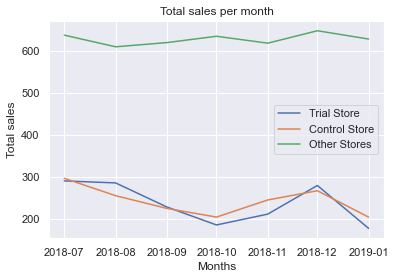

In [61]:
#plot the trend line 
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

In [62]:
#visualisation of nCustomers for the respective stores
controlCustPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','nCustomers']]
controlCustPlot.set_index('TransactionMonth',inplace=True)
controlCustPlot.rename(columns={'nCustomers':'Control Store'},inplace=True)
trialCustPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','nCustomers']]
trialCustPlot.set_index('TransactionMonth',inplace=True)
trialCustPlot.rename(columns={'nCustomers':'Trial Store'},inplace=True)
otherCustPlot =  pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','nCustomers']]
otherCustPlot.set_index('TransactionMonth',inplace=True)
otherCustPlot = pd.DataFrame(otherCustPlot.groupby('TransactionMonth').nCustomers.mean())
otherCustPlot.rename(columns={'nCustomers':'Other Store'},inplace=True)

In [63]:
CustomerPlot = pd.concat([controlCustPlot,trialCustPlot,otherCustPlot],axis=1)
CustomerPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


<function matplotlib.pyplot.show(close=None, block=None)>

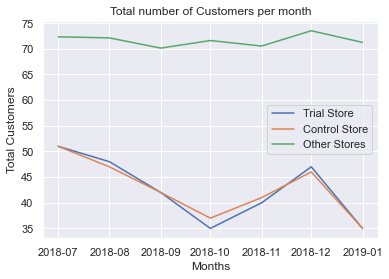

In [64]:
#plot the trend line 
plt.plot(CustomerPlot)
plt.title('Total number of Customers per month')
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

The visuals confirm the similarity between trial and control store sales during the pre-trial period. 

# Assessment of trial store 77 during trial period

In [65]:
#scale the control store sales to a similar level to control for any differences between the 2 stores outside of the trial period
measureOverTime.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


In [66]:
preTrialMeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [67]:
#pretrial scaling factor
trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','totSales' ].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','totSales'].sum()
scalingFactorForSales = trial_sum/control_sum
scalingFactorForSales

1.023617303289553

In [68]:
measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==control_store]
scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales
scaledControlSales.head()

<ipython-input-68-dd5f6bb43330>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,controlSales
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,297.565550
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,292.652187
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,233.998916
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,190.085733
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,216.597421


Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.

In [69]:
#calculate percentage difference between controlled sales and trial sales
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop=True,inplace=True)

#concatenate the trial sales and control sales to calculate percentage difference 
trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==trial_store,'totSales']
trialSales.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialSales],axis=1)

In [70]:
percentageDiff.rename(columns = {'totSales':'trialSales'},inplace=True)

In [71]:
percentageDiff

,YEARMONTH,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


The null-hypothesis for our analysis is that the sales during the trial period is similar to pre-trial period.

In [72]:
#calculating the absolute percentage difference between control sales and total sales 
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['trialSales'])/ percentageDiff['controlSales']
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [73]:
# importing Statistics module
import statistics

In [74]:
#to calculate the standard deviation for the percentageDiff
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.04994076264142529

As mentioned earlier, the trial period is the one preceding 2019-02, thus, there are 8 months in the pre-trial period. Hnece, the degrees of freedom are 
- 8-1 = 7
degrees of freedom. 

A t-value is calculated to find evidence of the significant difference between population means (2 samples) or a hypothesis and population mean. It measures the size of difference relative to the variation in sample data. 

The test-statistic for t-value = (x - u)/standard deviation; where x is the percentage difference and u is the null-hypothesis

In [75]:
#new column in data frame for t-value
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff,tvalue
0,201807,297.565550,296.8,0.002573,0.051515
1,201808,292.652187,255.5,0.126950,2.542011
2,201809,233.998916,225.2,0.037602,0.752940
3,201810,190.085733,204.5,0.075830,1.518406
4,201811,216.597421,245.3,0.132516,2.653459
5,201812,286.408121,267.3,0.066716,1.335911
6,201901,181.692071,204.4,0.124980,2.502571
7,201902,249.762622,235.0,0.059107,1.183534
8,201903,203.802205,278.5,0.366521,7.339116
9,201904,162.345704,263.5,0.623080,12.476373


In [76]:
#display data for the trial period 
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7     1.183534
8     7.339116
9    12.476373
Name: tvalue, dtype: float64

The tvalue is the highest in the 95th percentile. 

In [77]:
#reviewing pastSales
pastSales

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01
...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,4.291549,1.972222,OTHER STORES,2018-09-01
3160,272,201810,430.6,44,1.136364,4.349495,1.980000,OTHER STORES,2018-10-01
3161,272,201811,376.2,41,1.097561,4.324138,1.933333,OTHER STORES,2018-11-01
3162,272,201812,403.9,47,1.000000,4.538202,1.893617,OTHER STORES,2018-12-01


In [78]:
dof = 7

In [79]:
#t-value for 95th percentile for the 7 degrees of freedom
from scipy.stats import t
t.isf(0.05,dof)

1.8945786050613054

In [80]:
measureOverTime

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,4.346154,1.895833
3165,272,201903,442.3,50,1.060000,4.379208,1.905660
3166,272,201904,445.1,54,1.018519,4.239048,1.909091
3167,272,201905,314.6,34,1.176471,4.430986,1.775000


To plot the sales for trial and control store, appropriate dataframes must be created with appropriate datetime datatype, to plot the trendline. This trend line is plotted to compare the 5th percentile and 95th percentile in the confidence interval using t-value.

Reiterating the measureOverTime, scaledControlSales and pastSales dataframes for the process.

In [81]:
scaledControlSales.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,controlSales
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,297.565550
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,292.652187
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,233.998916
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,190.085733
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,216.597421


In [82]:
scaledControlSales.YEARMONTH.value_counts()

201808    1
201809    1
201810    1
201811    1
201812    1
201904    1
201905    1
201906    1
201903    1
201901    1
201902    1
201807    1
Name: YEARMONTH, dtype: int64

Since this dataframe contains scaled values for the control store sales:

In [83]:
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')

<ipython-input-83-c9b6f0244214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')


In [84]:
#extract control sales and transaction month from scaledControlSales
controlSales = scaledControlSales.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth',inplace=True)
controlSales.rename(columns={'controlSales':'Control Sales'})
controlSales

,controlSales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [85]:
measureOverTime.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn
0,1,201807,206.9,49,1.061224,3.337097,1.192308
1,1,201808,176.1,42,1.023810,3.261111,1.255814
2,1,201809,278.8,59,1.050847,3.717333,1.209677
3,1,201810,188.1,44,1.022727,3.243103,1.288889
4,1,201811,192.6,46,1.021739,3.378947,1.212766


Recalling that the measureOverTime dataframe contains all fields of transactions, in essense, transactions from pre-trial and during trial period.

In [86]:
measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')
measureOverTime.head()

<ipython-input-86-dbb9a40d64db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [87]:
trialSales = measureOverTime.loc[measureOverTime['STORE_NBR']==trial_store,['TransactionMonth','totSales']]
trialSales.set_index('TransactionMonth',inplace=True)
trialSales.rename(columns = {'totSales':'Trial Sales'},inplace=True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [88]:
#plot confidence intervals for control sales 
controlSales_95 = scaledControlSales.loc[:,['TransactionMonth','controlSales']]

In [89]:
controlSales_95

,TransactionMonth,controlSales
2699,2018-07-01,297.565550
2700,2018-08-01,292.652187
2701,2018-09-01,233.998916
2702,2018-10-01,190.085733
2703,2018-11-01,216.597421
2704,2018-12-01,286.408121
2705,2019-01-01,181.692071
2706,2019-02-01,249.762622
2707,2019-03-01,203.802205
2708,2019-04-01,162.345704


In [90]:
controlSales_95['controlSales'] = controlSales_95['controlSales'] * (1+stdDev *2)
controlSales_95

,TransactionMonth,controlSales
2699,2018-07-01,327.286851
2700,2018-08-01,321.882734
2701,2018-09-01,257.371084
2702,2018-10-01,209.071786
2703,2018-11-01,238.231502
2704,2018-12-01,315.015001
2705,2019-01-01,199.839753
2706,2019-02-01,274.709294
2707,2019-03-01,224.158280
2708,2019-04-01,178.561041


In [91]:
controlSales_95.rename(columns = {'controlSales':' Control 95th confidence interval'},inplace=True)

In [92]:
controlSales_5 = scaledControlSales.loc[:,['TransactionMonth','controlSales']]
controlSales_5['controlSales'] = controlSales_5['controlSales'] * (1 - stdDev * 2)
controlSales_5.rename(columns = {'controlSales':'Control 5th confidence interval'},inplace=True)
controlSales_5

,TransactionMonth,Control 5th confidence interval
2699,2018-07-01,267.844249
2700,2018-08-01,263.421640
2701,2018-09-01,210.626747
2702,2018-10-01,171.099680
2703,2018-11-01,194.963341
2704,2018-12-01,257.801241
2705,2019-01-01,163.544390
2706,2019-02-01,224.815950
2707,2019-03-01,183.446130
2708,2019-04-01,146.130368


In [93]:
controlSales_95.set_index('TransactionMonth',inplace=True)
controlSales_5.set_index('TransactionMonth',inplace=True)

In [94]:
combineSales = pd.merge(controlSales, controlSales_5, left_index=True, right_index=True)
combineSales = pd.merge(combineSales, controlSales_95, left_index=True, right_index=True)
combineSales = pd.merge(combineSales, trialSales, left_index=True, right_index=True)
combineSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


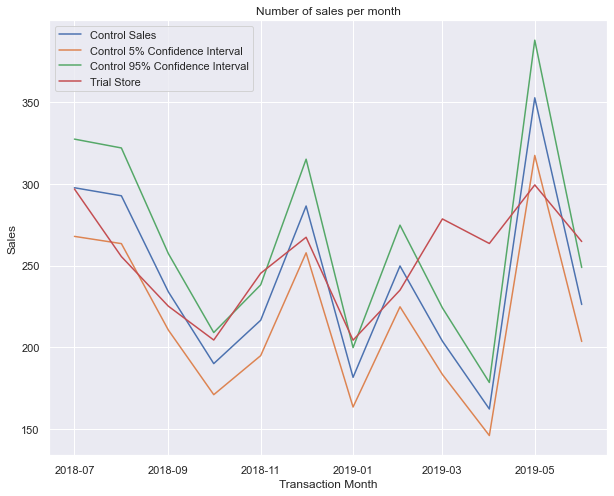

In [95]:
#plot dataframe to visualise trendline
plt.figure(figsize = (10,8))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

In [96]:
import matplotlib.dates as mdates

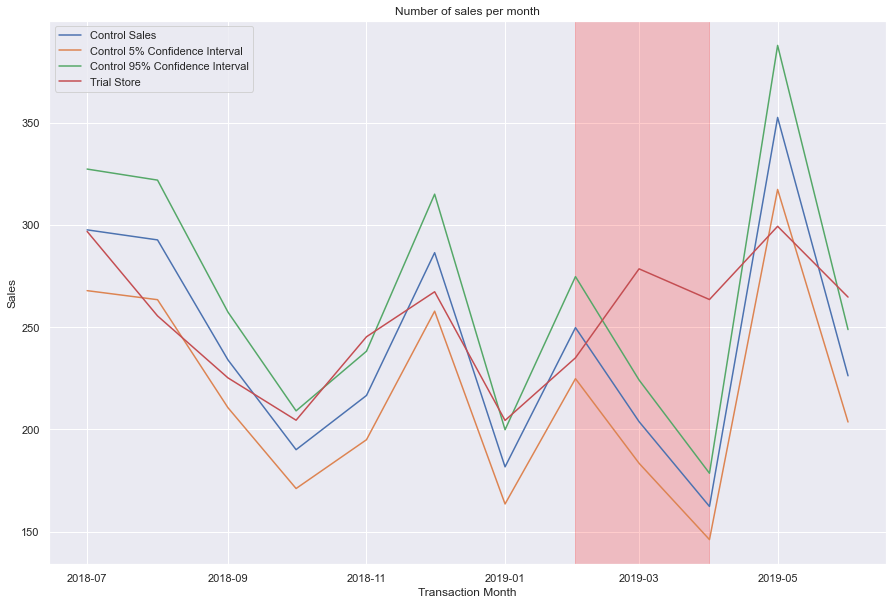

In [97]:
#to highlight the trial period 
plt.figure(figsize = (15,10))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

The trial store 77 has performed distinctly different in comparison to the control store during the trial period. The trial period lies outside the confidence interval of 5% and 95% of the control store.

Performing the same process to assess the number of customers per month during the pre-trial and trial period: 

In [98]:
#scaling the number of customers from pre-trial period for trial store and control store
trial_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','nCustomers'].sum()
control_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','nCustomers'].sum()
scalingFactorForCusts = trial_cust_sum/control_cust_sum
scalingFactorForCusts

1.0033557046979866

In [99]:
#scale the values for customers
measureOverTimeCusts = measureOverTime
scaledControlCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==control_store]
scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts
scaledControlCusts

<ipython-input-99-c8b2de7d482a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCusts
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01,40.134228
2704,233,201812,279.8,47,1.063830,3.730667,1.500000,2018-12-01,47.157718
2705,233,201901,177.5,35,1.000000,3.776596,1.342857,2019-01-01,35.117450
2706,233,201902,244.0,45,1.044444,3.485714,1.489362,2019-02-01,45.151007
2707,233,201903,199.1,40,1.025000,3.374576,1.439024,2019-03-01,40.134228
2708,233,201904,158.6,30,1.066667,3.447826,1.437500,2019-04-01,30.100671


Calculate the percentage difference amidst scaled control customers and the number of customers in control store 

In [100]:
scaledControlCusts.rename(columns={'controlCusts':'controlCustomers'},inplace=True)
#percentafeDiff for customers
percentageDiff= scaledControlCusts[['YEARMONTH','controlCustomers']]
percentageDiff.reset_index(drop=True,inplace=True)

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [101]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,'nCustomers']
trialCustomers.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialCustomers],axis=1)
percentageDiff

,YEARMONTH,controlCustomers,nCustomers
0,201807,51.171141,51
1,201808,48.161074,47
2,201809,42.140940,42
3,201810,35.117450,37
4,201811,40.134228,41
5,201812,47.157718,46
6,201901,35.117450,35
7,201902,45.151007,45
8,201903,40.134228,50
9,201904,30.100671,47


In [102]:
percentageDiff.rename(columns={'nCustomers':'trialCustomers'},inplace=True)

In [103]:
#calculate absolute percentage of the difference and add a column to the dataframe
percentageDiff['percentageDiff']= abs(percentageDiff['controlCustomers'] - percentageDiff['trialCustomers'])/percentageDiff['controlCustomers']
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


In [104]:
#stdDev
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.018240748558243945

In [105]:
#tvalue
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff,tvalue
0,201807,51.171141,51,0.003344,0.183352
1,201808,48.161074,47,0.024108,1.321664
2,201809,42.140940,42,0.003344,0.183352
3,201810,35.117450,37,0.053607,2.938874
4,201811,40.134228,41,0.021572,1.182622
5,201812,47.157718,46,0.024550,1.345883
6,201901,35.117450,35,0.003344,0.183352
7,201902,45.151007,45,0.003344,0.183352
8,201903,40.134228,50,0.245819,13.476388
9,201904,30.100671,47,0.561427,30.778725


The tvalue is almost 10 times over in the 95th percentile. Hence, to confirm the observation:

In [106]:
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7     0.183352
8    13.476388
9    30.778725
Name: tvalue, dtype: float64

In [107]:
#to plot customers per month, create appropriate dataframes
scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlCusts.head()

<ipython-input-107-b0d69c5c419f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCustomers
2699,233,201807,290.7,51,1.058824,3.303409,1.629630,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,3.573750,1.600000,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,3.265714,1.555556,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,3.316071,1.555556,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,3.412903,1.512195,2018-11-01,40.134228


In [108]:
controlCusts = scaledControlCusts.loc[:,['TransactionMonth','controlCustomers']]
controlCusts.set_index('TransactionMonth',inplace=True)

In [109]:
controlCusts.rename(columns={'controlCustomers':'Control Customers'},inplace=True)
controlCusts

,Control Customers
TransactionMonth,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [110]:
measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')
measureOverTimeCusts.head()

<ipython-input-110-1aaa1e3d6cd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [111]:
trialCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,['TransactionMonth','nCustomers']]
trialCusts.set_index('TransactionMonth',inplace=True)
trialCusts.rename(columns = {'nCustomers':'Trial Customers'},inplace=True)
trialCusts

,Trial Customers
TransactionMonth,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [112]:
controlCusts['Control 5th confidence interval'] = controlCusts['Control Customers'] * (1 - stdDev * 2)
controlCusts

,Control Customers,Control 5th confidence interval
TransactionMonth,,
2018-07-01,51.171141,49.304341
2018-08-01,48.161074,46.404086
2018-09-01,42.140940,40.603575
2018-10-01,35.117450,33.836313
2018-11-01,40.134228,38.670071
2018-12-01,47.157718,45.437334
2019-01-01,35.117450,33.836313
2019-02-01,45.151007,43.503830
2019-03-01,40.134228,38.670071


In [113]:
controlCusts['Control 95th confidence interval'] = controlCusts['Control Customers'] * (1 + stdDev * 2)
controlCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval
TransactionMonth,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [114]:
combineCusts = pd.merge(controlCusts,trialCusts,left_index=True,right_index=True)
combineCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval,Trial Customers
TransactionMonth,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35
2019-02-01,45.151007,43.503830,46.798183,45
2019-03-01,40.134228,38.670071,41.598385,50


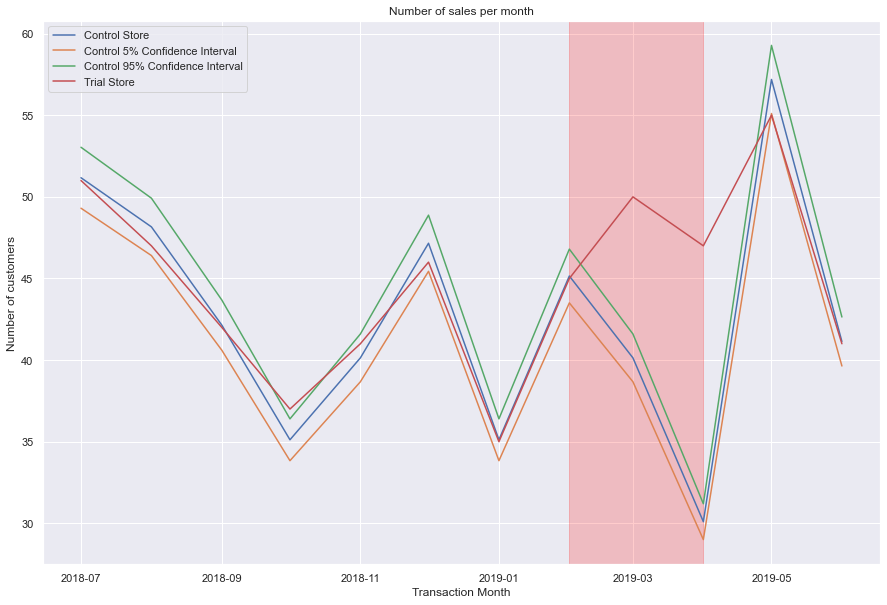

In [115]:
plt.figure(figsize = (15,10))
plt.plot(combineCusts)
plt.xlabel('Transaction Month')
plt.ylabel('Number of customers')
plt.title('Number of sales per month')
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

# Trial Store 86

Repeating the same analysis steps for store number 86. 

In [116]:
trial_store = 86

#use the functions for each metric initialised previously
corr_Sales  = calculateCorrelation(preTrialMeasures,'totSales',trial_store)
corr_customers  = calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
mag_sales = calculateMagnitudeDistance(preTrialMeasures,'totSales',trial_store)
mag_customers = calculateMagnitudeDistance(preTrialMeasures,'nCustomers',trial_store)

In [117]:
# concatenate the scores for each metric 
scores_nSales = pd.concat([corr_Sales,mag_sales['Magnitude']],axis=1)

#column to calculate simple average of the correlated score
corr_weight = 0.5
scores_nSales['scoreNSales'] = corr_weight * corr_Sales['Correlation'] + corr_weight * scores_nSales['Magnitude']

In [118]:
scores_nSales

,Store_1,Store_2,Correlation,Magnitude,scoreNSales
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497
...,...,...,...,...,...
255,86.0,268.0,-0.452182,0.291930,-0.080126
256,86.0,269.0,0.697055,0.480267,0.588661
257,86.0,270.0,-0.730679,0.517014,-0.106832
258,86.0,271.0,0.527637,0.565665,0.546651


In [119]:
#scores for nCustomers
scores_nCustomers = pd.concat([corr_customers,mag_customers['Magnitude']],axis=1)

scores_nCustomers['scoreNCustomers'] =  corr_weight * corr_customers['Correlation'] + corr_weight * scores_nCustomers['Magnitude']
scores_nCustomers.head()

,Store_1,Store_2,Correlation,Magnitude,scoreNCustomers
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [120]:
scores_nSales.set_index(['Store_1','Store_2'],inplace=True)
scores_nCustomers.set_index(['Store_1','Store_2'],inplace=True)

In [121]:
score_Control = pd.concat([scores_nSales['scoreNSales'],scores_nCustomers['scoreNCustomers']],axis=1)
score_Control.head()

scoreNSales  scoreNCustomers
Store_1 Store_2                              
86.0    1.0         0.466983         0.498018
        2.0        -0.041352         0.171205
        3.0         0.123116         0.104620
        4.0         0.298309         0.184103
        5.0         0.407497         0.230528

In [122]:
#to calculate final control score for the stores
#add a new column in score_Control
score_Control['finalControlScore']= score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCustomers'] * 0.5
score_Control.head()

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
86.0    1.0         0.466983         0.498018           0.482500
        2.0        -0.041352         0.171205           0.064927
        3.0         0.123116         0.104620           0.113868
        4.0         0.298309         0.184103           0.241206
        5.0         0.407497         0.230528           0.319013

In [123]:
#sort values in descending order
score_Control.sort_values(by='finalControlScore',ascending=False)

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
86.0    155.0       0.808106         0.733343           0.770724
        109.0       0.697120         0.742532           0.719826
        114.0       0.631393         0.663384           0.647389
        225.0       0.601841         0.684356           0.643099
        138.0       0.593296         0.660565           0.626930
...                      ...              ...                ...
        108.0      -0.221047        -0.081341          -0.151194
        185.0      -0.215914        -0.144274          -0.180094
        23.0       -0.209267        -0.164637          -0.186952
        120.0      -0.250917        -0.164042          -0.207479
        86.0             NaN              NaN                NaN

[260 rows x 3 columns]

The control store selected is 155 

In [124]:

control_store = 155

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-124-c0f40e73e5f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [125]:
#adding a transaction month column to denote the start of each month in pastSales
#this is done to plot the trend for customer transactions during the pre-trial period
#since the YEARMONTH column is an int, convert it to string and then datetime 
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

<ipython-input-125-9bf7f867c3aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


In [126]:
pastSales['store_type'].unique()

array(['OTHER STORES', 'TRIAL STORE', 'CONTROL STORE'], dtype=object)

In [127]:
pastSales[pastSales['store_type']=='CONTROL STORE']

,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
1793,155,201807,924.6,101,1.217822,3.698400,2.032520,CONTROL STORE,2018-07-01
1794,155,201808,782.7,91,1.307692,3.417904,1.924370,CONTROL STORE,2018-08-01
1795,155,201809,1014.4,103,1.398058,3.497931,2.013889,CONTROL STORE,2018-09-01
1796,155,201810,963.8,108,1.259259,3.543382,2.000000,CONTROL STORE,2018-10-01
1797,155,201811,898.8,101,1.316832,3.328889,2.030075,CONTROL STORE,2018-11-01
1798,155,201812,849.8,97,1.237113,3.511570,2.016667,CONTROL STORE,2018-12-01
1799,155,201901,874.6,96,1.302083,3.470635,2.016000,CONTROL STORE,2019-01-01


In [128]:
#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

In [129]:
controlSalesPlot

,Control Store
TransactionMonth,
2018-07-01,924.6
2018-08-01,782.7
2018-09-01,1014.4
2018-10-01,963.8
2018-11-01,898.8
2018-12-01,849.8
2019-01-01,874.6


In [130]:
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
SalesPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,924.6,892.20,633.239922
2018-08-01,782.7,764.05,606.326744
2018-09-01,1014.4,914.60,614.480620
2018-10-01,963.8,948.40,629.415504
2018-11-01,898.8,918.00,613.593411
2018-12-01,849.8,841.20,644.020155
2019-01-01,874.6,841.40,623.513566


<function matplotlib.pyplot.show(close=None, block=None)>

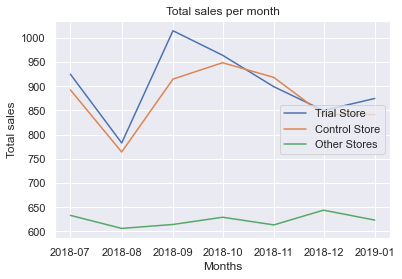

In [131]:
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

In [132]:
#visualisation of nCustomers for the respective stores
controlCustPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','nCustomers']]
controlCustPlot.set_index('TransactionMonth',inplace=True)
controlCustPlot.rename(columns={'nCustomers':'Control Store'},inplace=True)
trialCustPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','nCustomers']]
trialCustPlot.set_index('TransactionMonth',inplace=True)
trialCustPlot.rename(columns={'nCustomers':'Trial Store'},inplace=True)
otherCustPlot =  pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','nCustomers']]
otherCustPlot.set_index('TransactionMonth',inplace=True)
otherCustPlot = pd.DataFrame(otherCustPlot.groupby('TransactionMonth').nCustomers.mean())
otherCustPlot.rename(columns={'nCustomers':'Other Store'},inplace=True)

In [133]:
CustomerPlot = pd.concat([controlCustPlot,trialCustPlot,otherCustPlot],axis=1)
CustomerPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,101,99,71.953488
2018-08-01,91,94,71.771318
2018-09-01,103,103,69.658915
2018-10-01,108,109,71.046512
2018-11-01,101,100,70.069767
2018-12-01,97,98,73.120155
2019-01-01,96,94,70.775194


<function matplotlib.pyplot.show(close=None, block=None)>

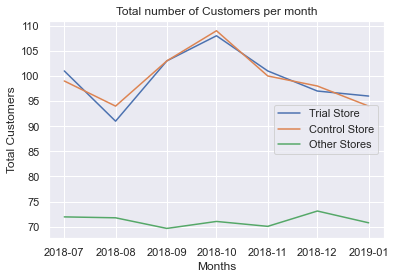

In [134]:
#plot the trend line 
plt.plot(CustomerPlot)
plt.title('Total number of Customers per month')
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

The trendline for the control and trial store is as similar as stated in the null hypothesis. Moving over to the assessment during the trial period to prove the theory:

# Assessment of trial store 86 during trial period

In [135]:
#pretrial scaling factor
trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','totSales' ].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','totSales'].sum()
scalingFactorForSales = trial_sum/control_sum
scalingFactorForSales

0.9700651481287746

In [136]:
measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==control_store]
scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales
scaledControlSales.head()

<ipython-input-136-dd5f6bb43330>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlSales
1793,155,201807,924.6,101,1.217822,3.698400,2.032520,2018-07-01,896.922236
1794,155,201808,782.7,91,1.307692,3.417904,1.924370,2018-08-01,759.269991
1795,155,201809,1014.4,103,1.398058,3.497931,2.013889,2018-09-01,984.034086
1796,155,201810,963.8,108,1.259259,3.543382,2.000000,2018-10-01,934.948790
1797,155,201811,898.8,101,1.316832,3.328889,2.030075,2018-11-01,871.894555


In [137]:
#calculate percentage difference between controlled sales and trial sales
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop=True,inplace=True)

#concatenate the trial sales and control sales to calculate percentage difference 
trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==trial_store,'totSales']
trialSales.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialSales],axis=1)

In [138]:
percentageDiff.rename(columns = {'totSales':'trialSales'},inplace=True)

The null-hypothesis for our analysis is that the sales during the trial period is similar to pre-trial period.

In [139]:
#calculating the absolute percentage difference between control sales and total sales 
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['trialSales'])/ percentageDiff['controlSales']
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


In [140]:
#to calculate the standard deviation for the percentageDiff
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.0258339528547724

In [141]:
#new column in data frame for t-value
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff,tvalue
0,201807,896.922236,892.20,0.005265,0.203799
1,201808,759.269991,764.05,0.006296,0.243692
2,201809,984.034086,914.60,0.070561,2.731315
3,201810,934.948790,948.40,0.014387,0.556907
4,201811,871.894555,918.00,0.052880,2.046904
5,201812,824.361363,841.20,0.020426,0.790676
6,201901,848.418979,841.40,0.008273,0.320238
7,201902,864.522060,913.20,0.056306,2.179542
8,201903,780.320405,1026.80,0.315870,12.226922
9,201904,819.317024,848.20,0.035253,1.364580


In [142]:
#display data for the trial period 
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7     2.179542
8    12.226922
9     1.364580
Name: tvalue, dtype: float64

In [143]:
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')

<ipython-input-143-c9b6f0244214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')


In [144]:
#extract control sales and transaction month from scaledControlSales
controlSales = scaledControlSales.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth',inplace=True)
controlSales.rename(columns={'controlSales':'Control Sales'})
controlSales

,controlSales
TransactionMonth,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [145]:
measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')
measureOverTime.head()

<ipython-input-145-dbb9a40d64db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,2018-11-01


In [146]:
trialSales = measureOverTime.loc[measureOverTime['STORE_NBR']==trial_store,['TransactionMonth','totSales']]
trialSales.set_index('TransactionMonth',inplace=True)
trialSales.rename(columns = {'totSales':'Trial Sales'},inplace=True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [147]:
controlSales['Control 5th confidence interval'] = controlSales['controlSales'] * (1 - stdDev * 2)
controlSales['Control 95th confidence interval'] = controlSales['controlSales'] * (1 + stdDev * 2)
controlSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval
TransactionMonth,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [148]:
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval,Trial Sales
TransactionMonth,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


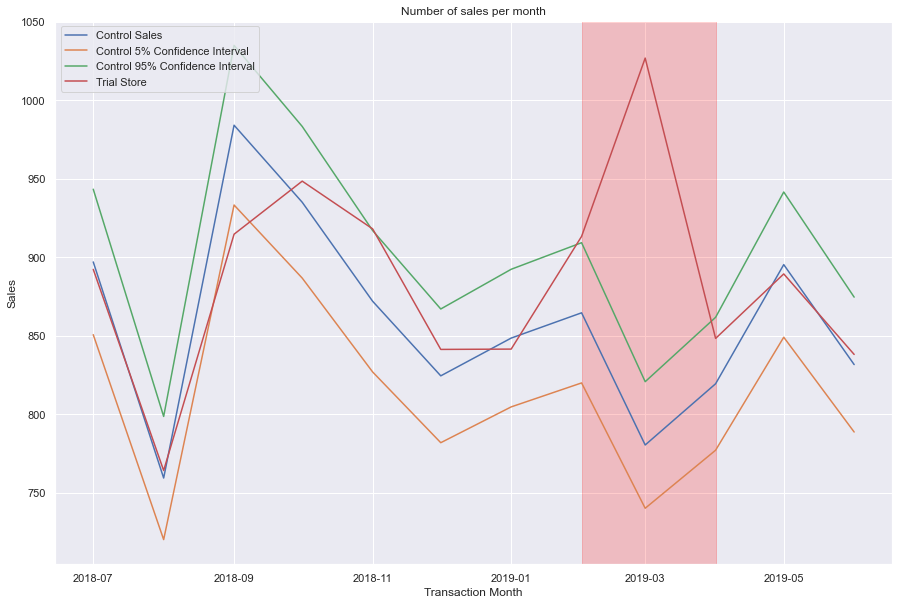

In [149]:
#to highlight the trial period 
plt.figure(figsize = (15,10))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

The trial store's sales are not significantly different than the control store during the trial period. Although there has been a peak in the month of March, on a whole, the sales have been between 5% and 95% of the control store confidence intervals.

Reiterating the same process for the number of customers. 

In [150]:
#scaling the number of customers from pre-trial period for trial store and control store
trial_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','nCustomers'].sum()
control_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','nCustomers'].sum()
scalingFactorForCusts = trial_cust_sum/control_cust_sum
scalingFactorForCusts

1.0

In [151]:
#scale the values for customers
measureOverTimeCusts = measureOverTime
scaledControlCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==control_store]
scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts
scaledControlCusts

<ipython-input-151-c8b2de7d482a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCusts
1793,155,201807,924.60,101,1.217822,3.698400,2.032520,2018-07-01,101.0
1794,155,201808,782.70,91,1.307692,3.417904,1.924370,2018-08-01,91.0
1795,155,201809,1014.40,103,1.398058,3.497931,2.013889,2018-09-01,103.0
1796,155,201810,963.80,108,1.259259,3.543382,2.000000,2018-10-01,108.0
1797,155,201811,898.80,101,1.316832,3.328889,2.030075,2018-11-01,101.0
1798,155,201812,849.80,97,1.237113,3.511570,2.016667,2018-12-01,97.0
1799,155,201901,874.60,96,1.302083,3.470635,2.016000,2019-01-01,96.0
1800,155,201902,891.20,95,1.315789,3.508661,2.032000,2019-02-01,95.0
1801,155,201903,804.40,94,1.255319,3.351667,2.033898,2019-03-01,94.0
1802,155,201904,844.60,99,1.212121,3.490083,2.016667,2019-04-01,99.0


Calculate the percentage difference amidst scaled control customers and the number of customers in control store 

In [152]:
scaledControlCusts.rename(columns={'controlCusts':'controlCustomers'},inplace=True)
#percentafeDiff for customers
percentageDiff= scaledControlCusts[['YEARMONTH','controlCustomers']]
percentageDiff.reset_index(drop=True,inplace=True)

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [153]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,'nCustomers']
trialCustomers.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialCustomers],axis=1)
percentageDiff.rename(columns={'nCustomers':'trialCustomers'},inplace=True)
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers
0,201807,101.0,99
1,201808,91.0,94
2,201809,103.0,103
3,201810,108.0,109
4,201811,101.0,100
5,201812,97.0,98
6,201901,96.0,94
7,201902,95.0,107
8,201903,94.0,115
9,201904,99.0,105


In [154]:
#calculate absolute percentage of the difference and add a column to the dataframe
percentageDiff['percentageDiff']= abs(percentageDiff['controlCustomers'] - percentageDiff['trialCustomers'])/percentageDiff['controlCustomers']
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


In [155]:
#stdDev
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.010687444701395236

In [156]:
#tvalue
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff,tvalue
0,201807,101.0,99,0.019802,1.852826
1,201808,91.0,94,0.032967,3.084651
2,201809,103.0,103,0.000000,0.000000
3,201810,108.0,109,0.009259,0.866368
4,201811,101.0,100,0.009901,0.926413
5,201812,97.0,98,0.010309,0.964616
6,201901,96.0,94,0.020833,1.949328
7,201902,95.0,107,0.126316,11.819082
8,201903,94.0,115,0.223404,20.903430
9,201904,99.0,105,0.060606,5.670772


In [157]:
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7    11.819082
8    20.903430
9     5.670772
Name: tvalue, dtype: float64

In [158]:
#to plot customers per month, create appropriate dataframes
scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlCusts.head()

<ipython-input-158-b0d69c5c419f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCustomers
1793,155,201807,924.6,101,1.217822,3.698400,2.032520,2018-07-01,101.0
1794,155,201808,782.7,91,1.307692,3.417904,1.924370,2018-08-01,91.0
1795,155,201809,1014.4,103,1.398058,3.497931,2.013889,2018-09-01,103.0
1796,155,201810,963.8,108,1.259259,3.543382,2.000000,2018-10-01,108.0
1797,155,201811,898.8,101,1.316832,3.328889,2.030075,2018-11-01,101.0


In [159]:
controlCusts = scaledControlCusts.loc[:,['TransactionMonth','controlCustomers']]
controlCusts.set_index('TransactionMonth',inplace=True)

In [160]:
controlCusts.rename(columns={'controlCustomers':'Control Customers'},inplace=True)
controlCusts

,Control Customers
TransactionMonth,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [161]:
measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')
trialCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,['TransactionMonth','nCustomers']]
trialCusts.set_index('TransactionMonth',inplace=True)
trialCusts.rename(columns = {'nCustomers':'Trial Customers'},inplace=True)
trialCusts

<ipython-input-161-e16fb5285ec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')


,Trial Customers
TransactionMonth,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [162]:
controlCusts['Control 5th confidence interval'] = controlCusts['Control Customers'] * (1 - stdDev * 2)
controlCusts['Control 95th confidence interval'] = controlCusts['Control Customers'] * (1 + stdDev * 2)
controlCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval
TransactionMonth,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


In [163]:
combineCusts = pd.merge(controlCusts,trialCusts,left_index=True,right_index=True)
combineCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval,Trial Customers
TransactionMonth,,,,
2018-07-01,101.0,98.841136,103.158864,99
2018-08-01,91.0,89.054885,92.945115,94
2018-09-01,103.0,100.798386,105.201614,103
2018-10-01,108.0,105.691512,110.308488,109
2018-11-01,101.0,98.841136,103.158864,100
2018-12-01,97.0,94.926636,99.073364,98
2019-01-01,96.0,93.948011,98.051989,94
2019-02-01,95.0,92.969386,97.030614,107
2019-03-01,94.0,91.990760,96.009240,115


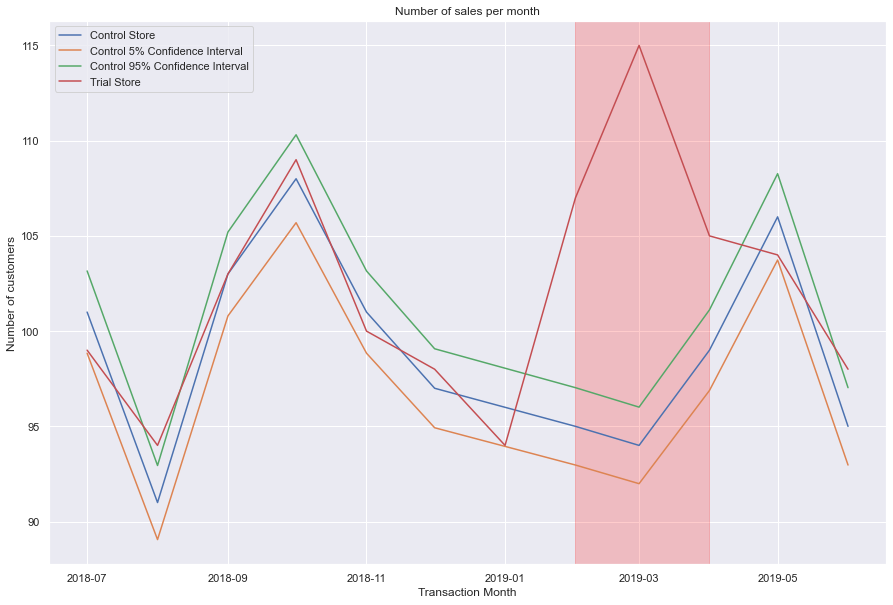

In [164]:
plt.figure(figsize = (15,10))
plt.plot(combineCusts)
plt.xlabel('Transaction Month')
plt.ylabel('Number of customers')
plt.title('Number of sales per month')
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

On contrary to the sales output, the number of customers seem to be considerably higher during all 3 months of the trial period. The impact of the significant raise in customer number did not reflect as much in the sales in store number 86. This could also be due to various reasons such as monthly offers.

# Trial Store 88

In [165]:
trial_store = 88

#use the functions for each metric initialised previously
corr_Sales  = calculateCorrelation(preTrialMeasures,'totSales',trial_store)
corr_customers  = calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)
mag_sales = calculateMagnitudeDistance(preTrialMeasures,'totSales',trial_store)
mag_customers = calculateMagnitudeDistance(preTrialMeasures,'nCustomers',trial_store)

In [166]:
# concatenate the scores for each metric 
scores_nSales = pd.concat([corr_Sales,mag_sales['Magnitude']],axis=1)

#column to calculate simple average of the correlated score
corr_weight = 0.5
scores_nSales['scoreNSales'] = corr_weight * corr_Sales['Correlation'] + corr_weight * scores_nSales['Magnitude']

In [167]:
scores_nSales

,Store_1,Store_2,Correlation,Magnitude,scoreNSales
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370
...,...,...,...,...,...
255,88.0,268.0,-0.021429,0.522847,0.250709
256,88.0,269.0,-0.172578,0.564856,0.196139
257,88.0,270.0,-0.723272,0.513329,-0.104971
258,88.0,271.0,-0.103037,0.429220,0.163091


In [168]:
#scores for nCustomers
scores_nCustomers = pd.concat([corr_customers,mag_customers['Magnitude']],axis=1)

scores_nCustomers['scoreNCustomers'] =  corr_weight * corr_customers['Correlation'] + corr_weight * scores_nCustomers['Magnitude']
scores_nCustomers.head()

,Store_1,Store_2,Correlation,Magnitude,scoreNCustomers
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [169]:
scores_nSales.set_index(['Store_1','Store_2'],inplace=True)
scores_nCustomers.set_index(['Store_1','Store_2'],inplace=True)

In [170]:
score_Control = pd.concat([scores_nSales['scoreNSales'],scores_nCustomers['scoreNCustomers']],axis=1)
score_Control.head()

scoreNSales  scoreNCustomers
Store_1 Store_2                              
88.0    1.0         0.681297         0.331238
        2.0         0.236643        -0.083332
        3.0        -0.024869         0.603279
        4.0        -0.130559         0.108210
        5.0         0.343370         0.266561

In [171]:
#to calculate final control score for the stores
#add a new column in score_Control
score_Control['finalControlScore']= score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCustomers'] * 0.5
score_Control.head()

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
88.0    1.0         0.681297         0.331238           0.506268
        2.0         0.236643        -0.083332           0.076655
        3.0        -0.024869         0.603279           0.289205
        4.0        -0.130559         0.108210          -0.011175
        5.0         0.343370         0.266561           0.304965

In [172]:
#sort values in descending order
score_Control.sort_values(by='finalControlScore',ascending=False)

scoreNSales  scoreNCustomers  finalControlScore
Store_1 Store_2                                                 
88.0    178.0       0.650803         0.707828           0.679316
        14.0        0.646064         0.685774           0.665919
        134.0       0.775084         0.540154           0.657619
        237.0       0.451974         0.777235           0.614604
        187.0       0.616752         0.594560           0.605656
...                      ...              ...                ...
        48.0       -0.174440        -0.050650          -0.112545
        239.0      -0.109933        -0.123703          -0.116818
        133.0      -0.119811        -0.175477          -0.147644
        19.0       -0.081841        -0.247593          -0.164717
        88.0             NaN              NaN                NaN

[260 rows x 3 columns]

The highest control store score for store 88 is of store number 178

In [173]:
control_store = 178

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-173-650b4c49344c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [174]:
#adding a transaction month column to denote the start of each month in pastSales
#this is done to plot the trend for customer transactions during the pre-trial period
#since the YEARMONTH column is an int, convert it to string and then datetime 
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

<ipython-input-174-9bf7f867c3aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


In [175]:
pastSales['store_type'].unique()

array(['OTHER STORES', 'TRIAL STORE', 'CONTROL STORE'], dtype=object)

In [176]:
#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

In [177]:
#to plot 
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
SalesPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,952.0,1310.0,631.514341
2018-08-01,915.5,1323.8,603.642442
2018-09-01,954.4,1423.0,612.742636
2018-10-01,962.6,1352.4,627.854264
2018-11-01,975.6,1382.8,611.494186
2018-12-01,947.2,1325.2,641.766667
2019-01-01,837.2,1266.4,622.011240


<function matplotlib.pyplot.show(close=None, block=None)>

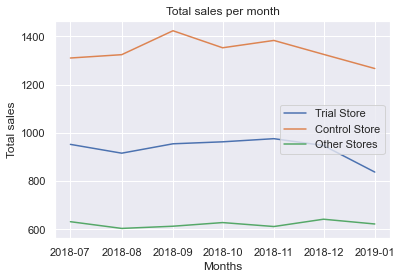

In [178]:
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

The visual above contradicts the final score, paving way for being an anomaly. We could check the the consecutive stores by visualising their plot and then deciding on a control store.

# Quick EDA for the control store 

In [179]:
control_store = 14

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-179-f163a434ac66>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [180]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

#to plot 
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
SalesPlot

<ipython-input-180-855bb7925888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,46.9,1310.0,635.022481
2018-08-01,46.8,1323.8,607.009496
2018-09-01,47.5,1423.0,616.257752
2018-10-01,42.0,1352.4,631.422481
2018-11-01,47.6,1382.8,615.091085
2018-12-01,34.4,1325.2,645.304651
2019-01-01,18.0,1266.4,625.186434


<function matplotlib.pyplot.show(close=None, block=None)>

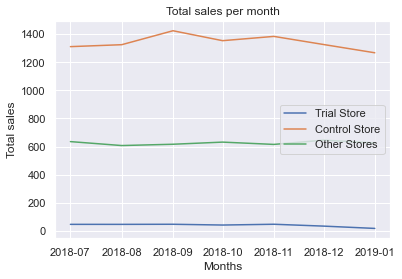

In [181]:
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

In [182]:
control_store = 134

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-182-ab9f19620a52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [183]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

#to plot 
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
SalesPlot

<ipython-input-183-855bb7925888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,419.20,1310.0,633.579457
2018-08-01,432.65,1323.8,605.513953
2018-09-01,463.80,1423.0,614.644186
2018-10-01,473.40,1352.4,629.750388
2018-11-01,467.60,1382.8,613.463178
2018-12-01,413.40,1325.2,643.835659
2019-01-01,384.20,1266.4,623.767054


<function matplotlib.pyplot.show(close=None, block=None)>

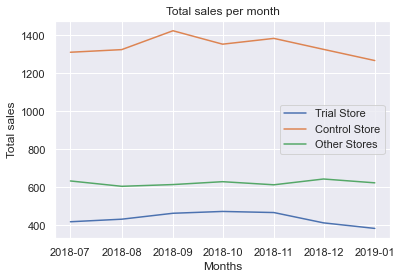

In [184]:
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

In [185]:
control_store = 237

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

<ipython-input-185-6c5f225c6924>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,3.337097,1.192308,OTHER STORES,2018-07-01
1,1,201808,176.1,42,1.023810,3.261111,1.255814,OTHER STORES,2018-08-01
2,1,201809,278.8,59,1.050847,3.717333,1.209677,OTHER STORES,2018-09-01
3,1,201810,188.1,44,1.022727,3.243103,1.288889,OTHER STORES,2018-10-01
4,1,201811,192.6,46,1.021739,3.378947,1.212766,OTHER STORES,2018-11-01


In [186]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

#to plot 
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
SalesPlot

<ipython-input-186-855bb7925888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,1448.4,1310.0,629.590310
2018-08-01,1367.8,1323.8,601.889341
2018-09-01,1322.2,1423.0,611.317054
2018-10-01,1348.3,1352.4,626.359302
2018-11-01,1397.6,1382.8,609.858527
2018-12-01,1265.0,1325.2,640.534884
2019-01-01,1219.7,1266.4,620.528682


<function matplotlib.pyplot.show(close=None, block=None)>

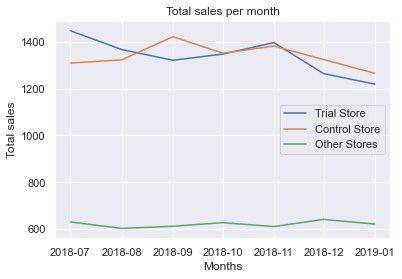

In [187]:
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

- Store number 237 has generated a far more similar result to trial store unlike the its predecessors. Hence, the control store chosen is 237

In [189]:
#visualisation of nCustomers for the respective stores
controlCustPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','nCustomers']]
controlCustPlot.set_index('TransactionMonth',inplace=True)
controlCustPlot.rename(columns={'nCustomers':'Control Store'},inplace=True)
trialCustPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','nCustomers']]
trialCustPlot.set_index('TransactionMonth',inplace=True)
trialCustPlot.rename(columns={'nCustomers':'Trial Store'},inplace=True)
otherCustPlot =  pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','nCustomers']]
otherCustPlot.set_index('TransactionMonth',inplace=True)
otherCustPlot = pd.DataFrame(otherCustPlot.groupby('TransactionMonth').nCustomers.mean())
otherCustPlot.rename(columns={'nCustomers':'Other Store'},inplace=True)

In [190]:
CustomerPlot = pd.concat([controlCustPlot,trialCustPlot,otherCustPlot],axis=1)
CustomerPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,128,129,71.732558
2018-08-01,135,131,71.457364
2018-09-01,126,124,69.488372
2018-10-01,123,123,70.934109
2018-11-01,132,130,69.833333
2018-12-01,124,126,72.906977
2019-01-01,117,117,70.604651


<function matplotlib.pyplot.show(close=None, block=None)>

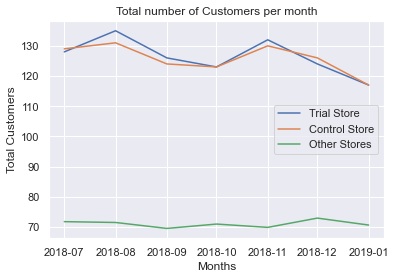

In [191]:
#plot the trend line 
plt.plot(CustomerPlot)
plt.title('Total number of Customers per month')
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

# Assessment of trial store 88 during trial period

In [188]:
#pretrial scaling factor
trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','totSales' ].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','totSales'].sum()
scalingFactorForSales = trial_sum/control_sum
scalingFactorForSales

1.0015583306649594

In [192]:
measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==control_store]
scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales
scaledControlSales.head()

<ipython-input-192-dd5f6bb43330>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,4.470370,2.000000,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,4.369968,1.896970,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,4.422074,2.006711,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,4.509365,2.034014,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,4.367500,1.987578,2018-11-01,1399.777923


In [193]:
#calculate percentage difference between controlled sales and trial sales
percentageDiff = scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop=True,inplace=True)

#concatenate the trial sales and control sales to calculate percentage difference 
trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==trial_store,'totSales']
trialSales.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialSales],axis=1)

In [194]:
percentageDiff.rename(columns = {'totSales':'trialSales'},inplace=True)

The null-hypothesis for our analysis is that the sales during the trial period is similar to pre-trial period.

In [195]:
#calculating the absolute percentage difference between control sales and total sales 
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['trialSales'])/ percentageDiff['controlSales']
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


In [196]:
#to calculate the standard deviation for the percentageDiff
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.03346786730307896

In [197]:
#new column in data frame for t-value
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff,tvalue
0,201807,1450.657086,1310.00,0.096961,2.897136
1,201808,1369.931485,1323.80,0.033674,1.006168
2,201809,1324.260425,1423.00,0.074562,2.227870
3,201810,1350.401097,1352.40,0.001480,0.044228
4,201811,1399.777923,1382.80,0.012129,0.362408
5,201812,1266.971288,1325.20,0.045959,1.373227
6,201901,1221.600696,1266.40,0.036673,1.095756
7,201902,1406.989143,1370.20,0.026147,0.781270
8,201903,1210.082775,1477.20,0.220743,6.595668
9,201904,1206.477165,1439.40,0.193060,5.768527


In [198]:
#display data for the trial period 
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7    0.781270
8    6.595668
9    5.768527
Name: tvalue, dtype: float64

In [199]:
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')

#extract control sales and transaction month from scaledControlSales
controlSales = scaledControlSales.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth',inplace=True)
controlSales.rename(columns={'controlSales':'Control Sales'})
controlSales

<ipython-input-199-c82badf25696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')


,controlSales
TransactionMonth,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [200]:
measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')

trialSales = measureOverTime.loc[measureOverTime['STORE_NBR']==trial_store,['TransactionMonth','totSales']]
trialSales.set_index('TransactionMonth',inplace=True)
trialSales.rename(columns = {'totSales':'Trial Sales'},inplace=True)
trialSales

<ipython-input-200-ad3be825ff49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTime['TransactionMonth']= pd.to_datetime(measureOverTime['YEARMONTH'].astype(str),format='%Y%m')


,Trial Sales
TransactionMonth,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [201]:
controlSales['Control 5th confidence interval'] = controlSales['controlSales'] * (1 - stdDev * 2)
controlSales['Control 95th confidence interval'] = controlSales['controlSales'] * (1 + stdDev * 2)
controlSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval
TransactionMonth,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [202]:
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval,Trial Sales
TransactionMonth,,,,
2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
2019-03-01,1210.082775,1129.084996,1291.080555,1477.20


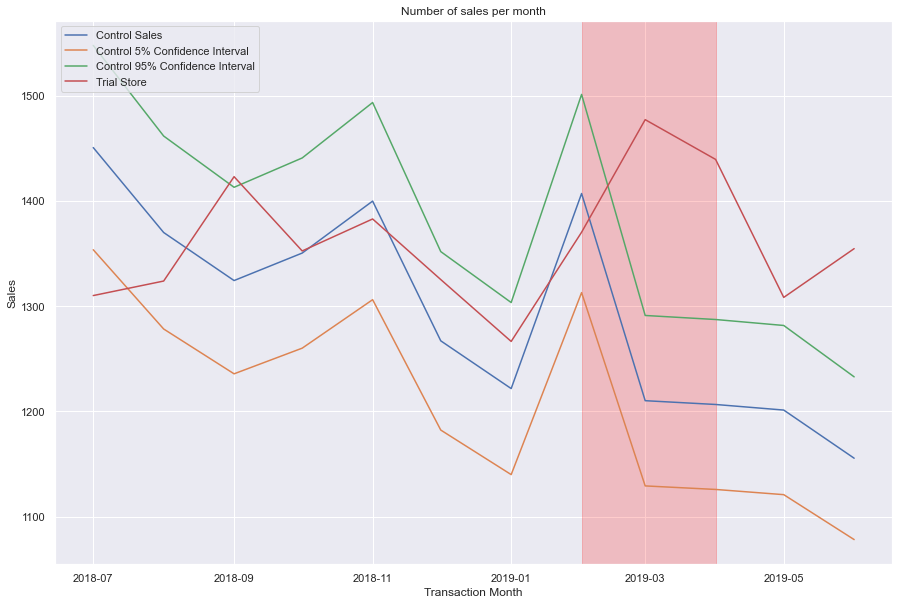

In [203]:
#to highlight the trial period 
plt.figure(figsize = (15,10))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

The sales in store 88 has a comparatively different trend than its predecessors. The total number of sales significantly lie outside of the 5% and 95% confidence intervals. This has occurred for 2 out of 3 trial months. 

In [204]:
#for customers 

#scaling the number of customers from pre-trial period for trial store and control store
trial_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','nCustomers'].sum()
control_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','nCustomers'].sum()
scalingFactorForCusts = trial_cust_sum/control_cust_sum
scalingFactorForCusts

0.9943502824858758

In [205]:
#scale the values for customers
measureOverTimeCusts = measureOverTime
scaledControlCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==control_store]
scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts
scaledControlCusts

<ipython-input-205-c8b2de7d482a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCusts
2747,237,201807,1448.4,128,1.265625,4.470370,2.000000,2018-07-01,127.276836
2748,237,201808,1367.8,135,1.222222,4.369968,1.896970,2018-08-01,134.237288
2749,237,201809,1322.2,126,1.182540,4.422074,2.006711,2018-09-01,125.288136
2750,237,201810,1348.3,123,1.195122,4.509365,2.034014,2018-10-01,122.305085
2751,237,201811,1397.6,132,1.219697,4.367500,1.987578,2018-11-01,131.254237
2752,237,201812,1265.0,124,1.161290,4.377163,2.006944,2018-12-01,123.299435
2753,237,201901,1219.7,117,1.188034,4.403249,1.992806,2019-01-01,116.338983
2754,237,201902,1404.8,126,1.246032,4.473885,2.000000,2019-02-01,125.288136
2755,237,201903,1208.2,119,1.126050,4.409489,2.044776,2019-03-01,118.327684
2756,237,201904,1204.6,120,1.125000,4.428676,2.014815,2019-04-01,119.322034


In [206]:
scaledControlCusts.rename(columns={'controlCusts':'controlCustomers'},inplace=True)
#percentafeDiff for customers
percentageDiff= scaledControlCusts[['YEARMONTH','controlCustomers']]
percentageDiff.reset_index(drop=True,inplace=True)

trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,'nCustomers']
trialCustomers.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialCustomers],axis=1)
percentageDiff.rename(columns={'nCustomers':'trialCustomers'},inplace=True)

#calculate absolute percentage of the difference and add a column to the dataframe
percentageDiff['percentageDiff']= abs(percentageDiff['controlCustomers'] - percentageDiff['trialCustomers'])/percentageDiff['controlCustomers']
percentageDiff

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556
5,201812,123.299435,126,0.021902
6,201901,116.338983,117,0.005682
7,201902,125.288136,124,0.010281
8,201903,118.327684,134,0.132448
9,201904,119.322034,128,0.072727


In [207]:
#stdDev
stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEARMONTH']<201902,'percentageDiff'])
stdDev

0.00741024435207507

In [208]:
#tvalue
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff,tvalue
0,201807,127.276836,129,0.013539,1.827026
1,201808,134.237288,131,0.024116,3.254435
2,201809,125.288136,124,0.010281,1.387456
3,201810,122.305085,123,0.005682,0.766752
4,201811,131.254237,130,0.009556,1.289537
5,201812,123.299435,126,0.021902,2.955705
6,201901,116.338983,117,0.005682,0.766752
7,201902,125.288136,124,0.010281,1.387456
8,201903,118.327684,134,0.132448,17.873693
9,201904,119.322034,128,0.072727,9.814423


In [209]:
percentageDiff.loc[(percentageDiff['YEARMONTH']>201901) & (percentageDiff['YEARMONTH']<201905),'tvalue']

7     1.387456
8    17.873693
9     9.814423
Name: tvalue, dtype: float64

In [210]:
#to plot customers per month, create appropriate dataframes
scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlCusts.head()

<ipython-input-210-b0d69c5c419f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEARMONTH'].astype(str), format = '%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nChipsPerCust,avgPricePerUnit,nChipsPerTxn,TransactionMonth,controlCustomers
2747,237,201807,1448.4,128,1.265625,4.470370,2.000000,2018-07-01,127.276836
2748,237,201808,1367.8,135,1.222222,4.369968,1.896970,2018-08-01,134.237288
2749,237,201809,1322.2,126,1.182540,4.422074,2.006711,2018-09-01,125.288136
2750,237,201810,1348.3,123,1.195122,4.509365,2.034014,2018-10-01,122.305085
2751,237,201811,1397.6,132,1.219697,4.367500,1.987578,2018-11-01,131.254237


In [211]:
controlCusts = scaledControlCusts.loc[:,['TransactionMonth','controlCustomers']]
controlCusts.set_index('TransactionMonth',inplace=True)
controlCusts.rename(columns={'controlCustomers':'Control Customers'},inplace=True)
controlCusts

,Control Customers
TransactionMonth,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [212]:
measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')
trialCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,['TransactionMonth','nCustomers']]
trialCusts.set_index('TransactionMonth',inplace=True)
trialCusts.rename(columns = {'nCustomers':'Trial Customers'},inplace=True)
trialCusts

<ipython-input-212-e16fb5285ec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEARMONTH'].astype(str),format='%Y%m')


,Trial Customers
TransactionMonth,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [213]:
controlCusts['Control 5th confidence interval'] = controlCusts['Control Customers'] * (1 - stdDev * 2)
controlCusts['Control 95th confidence interval'] = controlCusts['Control Customers'] * (1 + stdDev * 2)
controlCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval
TransactionMonth,,,
2018-07-01,127.276836,125.390531,129.163141
2018-08-01,134.237288,132.247826,136.226750
2018-09-01,125.288136,123.431304,127.144967
2018-10-01,122.305085,120.492464,124.117706
2018-11-01,131.254237,129.308985,133.199489
2018-12-01,123.299435,121.472077,125.126793
2019-01-01,116.338983,114.614782,118.063184
2019-02-01,125.288136,123.431304,127.144967
2019-03-01,118.327684,116.574010,120.081358


In [214]:
combineCusts = pd.merge(controlCusts,trialCusts,left_index=True,right_index=True)
combineCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval,Trial Customers
TransactionMonth,,,,
2018-07-01,127.276836,125.390531,129.163141,129
2018-08-01,134.237288,132.247826,136.226750,131
2018-09-01,125.288136,123.431304,127.144967,124
2018-10-01,122.305085,120.492464,124.117706,123
2018-11-01,131.254237,129.308985,133.199489,130
2018-12-01,123.299435,121.472077,125.126793,126
2019-01-01,116.338983,114.614782,118.063184,117
2019-02-01,125.288136,123.431304,127.144967,124
2019-03-01,118.327684,116.574010,120.081358,134


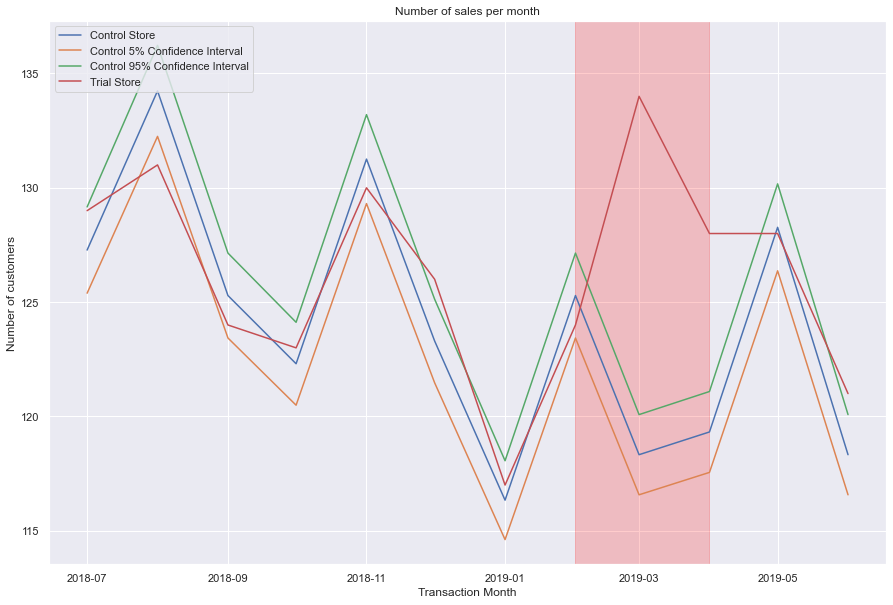

In [215]:
plt.figure(figsize = (15,10))
plt.plot(combineCusts)
plt.xlabel('Transaction Month')
plt.ylabel('Number of customers')
plt.title('Number of sales per month')
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

Supporting the result for sales, the number of customers have also increased for 2 out of 3 trial months. As mentioned for store 86, this result could be a possibility of the number of offers being available during the sale period of time and may have reflected well in store 88. 

# Conclusion 

The stores 77 and 88 have had significant improvements for 2 out of 3 months during the trial period. However, store 86 remains an outlier in this trio. There may be various factors that support the results for store number 86 and this can clarified by the category manager and their implementation techniques. 

Nevertheless, in a broader sense, the stores have displayed a significant drive in sales. 